In [1]:
import pandas as pd 

In [2]:
df = pd.read_excel(r"C:\Users\David gathara marigi\Downloads\default of credit card clients.xls", skiprows=1, index_col=0, engine="xlrd")

In [3]:
train_features = df.drop('default payment next month', axis=1) 
train_targets = df['default payment next month']

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
lr_sklearn = LogisticRegression(random_state=42) 
lr_sklearn.fit(train_features, train_targets) 

c:\Users\David gathara marigi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [6]:
lr_sklearn.score(train_features, train_targets)

0.7788333333333334

In [7]:
#Getting predictions from our model

In [8]:
predictions = lr_sklearn.predict(train_features)

In [9]:
lr_sklearn.predict(train_features.iloc[-1].values.reshape(1, -1))

c:\Users\David gathara marigi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [10]:
lr_sklearn.predict_proba(train_features)

array([[0.54131316, 0.45868684],
       [0.65881359, 0.34118641],
       [0.65863005, 0.34136995],
       ...,
       [0.5933197 , 0.4066803 ],
       [0.97733937, 0.02266063],
       [0.60782068, 0.39217932]], shape=(30000, 2))

In [11]:
proba_predictions = lr_sklearn.predict_proba(train_features)[:, 1] 
proba_predictions = (proba_predictions >= 0.5).astype('int')

In [12]:
import numpy as np

In [13]:
predictions = lr_sklearn.predict(train_features) 
np.array_equal(predictions, np.round(proba_predictions))

True

In [14]:
lr_sklearn.intercept_ 
lr_sklearn.coef_

array([[-5.06182703e-06, -3.90639460e-05, -4.82983900e-05,
        -4.08917129e-05, -6.92664443e-04,  5.07619635e-05,
         3.94060050e-05,  3.47789895e-05,  3.27756592e-05,
         3.08015602e-05,  2.88206868e-05, -7.77827919e-06,
        -1.44302353e-07,  2.43704304e-06,  3.72519933e-06,
         2.41538993e-06,  3.86042891e-06, -3.79837697e-05,
        -2.65896522e-05, -1.43929154e-05, -1.07651430e-05,
        -1.02295962e-05,  4.04553970e-07]])

In [15]:
#Examining feature importances with sklearn

In [16]:
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 

([<matplotlib.axis.XTick at 0x1da612c7a40>,
 [Text(0, 0, 'PAY_0'),
  Text(1, 0, 'BILL_AMT1'),
  Text(2, 0, 'PAY_AMT2'),
  Text(3, 0, 'PAY_AMT1'),
  Text(4, 0, 'BILL_AMT2'),
  Text(5, 0, 'BILL_AMT3'),
  Text(6, 0, 'PAY_2'),
  Text(7, 0, 'LIMIT_BAL'),
  Text(8, 0, 'PAY_3'),
  Text(9, 0, 'MARRIAGE'),
  Text(10, 0, 'EDUCATION'),
  Text(11, 0, 'AGE'),
  Text(12, 0, 'PAY_AMT4'),
  Text(13, 0, 'SEX'),
  Text(14, 0, 'PAY_AMT5'),
  Text(15, 0, 'PAY_AMT3'),
  Text(16, 0, 'PAY_5'),
  Text(17, 0, 'PAY_AMT6'),
  Text(18, 0, 'BILL_AMT5'),
  Text(19, 0, 'BILL_AMT6'),
  Text(20, 0, 'PAY_4'),
  Text(21, 0, 'BILL_AMT4'),
  Text(22, 0, 'PAY_6')])

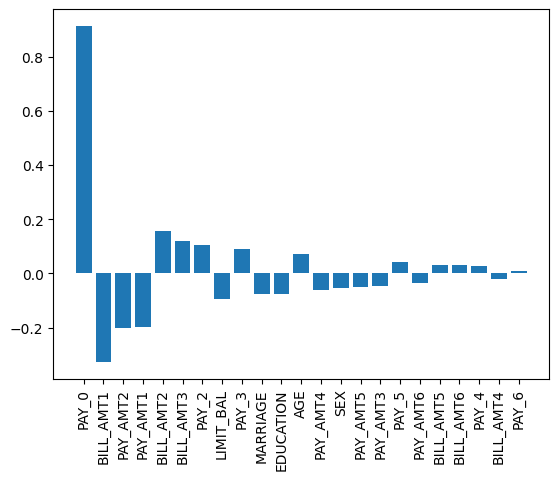

In [17]:
scaler = StandardScaler() 
scaled_features = scaler.fit_transform(train_features) 
scaled_lr_model = LogisticRegression(random_state=42) 
scaled_lr_model.fit(scaled_features, train_targets) 
logit_coef = np.exp(scaled_lr_model.coef_[0]) - 1 
idx = abs(logit_coef).argsort()[::-1] 
plt.bar(range(len(idx)), logit_coef[idx]) 
plt.xticks(range(len(idx)), train_features.columns[idx], 
rotation=90)


In [18]:
#Using statmodels for logistic regression

In [19]:
import statsmodels.api as sm 
import numpy as np 

In [20]:
np.random.seed(42) 
lr_model = sm.Logit(train_targets, train_features) 
lr_results = lr_model.fit() 
lr_results.summary() 

Optimization terminated successfully.
         Current function value: 0.465175
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29977
Method:                                   MLE   Df Model:                           22
Date:                        Sun, 30 Mar 2025   Pseudo R-squ.:                  0.1197
Time:                                15:00:30   Log-Likelihood:                -13955.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL  -9.196e-07   1.55e-07     -5.927      0.000   -1.22e-06   -6.16e-07
SEX           -0.1963      0.027     -7.391      0.000      -0.248      -0.144
EDUCATION     -0.1383      0.020     -6.869      0.000      -0.178      -0.099
MARRIAGE      -0.2827      0.023    -12.438      0.000      -0.327      -0.238
AGE            0.0005      0.001      0.394      0.693      -0.002       0.003
PAY_0          0.5733      0.018     32.431      0.000       0.539       0.608
PAY_2          0.0801      0.020      3.971      0.000       0.041       0.120
PAY_3          0.0702      0.023      3.109      0.002       0.026       0.114
PAY_4          0.0243      0.025      0.972      0.331      -0.025       0.073
PAY_5          0.0337      0.027      1.255      0.209      -0.019       0.086
PAY_6          0.0096      0.022      0.436      0.663      -0.034       0.053
BILL_AMT1  -5.577e-06   1.14e-06     -4.886      0.000   -7.81e-06   -3.34e-06
BILL_AMT2   2.385e-06   1.51e-06      1.576      0.115   -5.81e-07    5.35e-06
BILL_AMT3   1.442e-06   1.33e-06      1.086      0.278   -1.16e-06    4.05e-06
BILL_AMT4  -1.946e-07   1.35e-06     -0.144      0.886   -2.85e-06    2.46e-06
BILL_AMT5   6.158e-07   1.53e-06      0.403      0.687   -2.38e-06    3.61e-06
BILL_AMT6   4.078e-07   1.21e-06      0.338      0.735   -1.95e-06    2.77e-06
PAY_AMT1   -1.405e-05   2.33e-06     -6.024      0.000   -1.86e-05   -9.48e-06
PAY_AMT2   -9.883e-06   2.12e-06     -4.671      0.000    -1.4e-05   -5.74e-06
PAY_AMT3   -2.821e-06   1.73e-06     -1.626      0.104   -6.22e-06    5.79e-07
PAY_AMT4   -4.134e-06   1.79e-06     -2.305      0.021   -7.65e-06   -6.18e-07
PAY_AMT5   -3.311e-06   1.79e-06     -1.850      0.064   -6.82e-06    1.97e-07
PAY_AMT6   -2.085e-06    1.3e-06     -1.606      0.108   -4.63e-06     4.6e-07
==============================================================================
"""

In [21]:
added_features = sm.add_constant(train_features)
mask = lr_results.pvalues.reindex(added_features.columns) < 0.05
selected_features = added_features.loc[:, mask]
lr_model_trimmed = sm.Logit(train_targets, selected_features) 
lr_trimmed_results = lr_model_trimmed.fit() 
lr_trimmed_results.summary()

Optimization terminated successfully.
         Current function value: 0.466015
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29989
Method:                                   MLE   Df Model:                           10
Date:                        Sun, 30 Mar 2025   Pseudo R-squ.:                  0.1181
Time:                                15:00:31   Log-Likelihood:                -13980.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL  -1.044e-06   1.43e-07     -7.308      0.000   -1.32e-06   -7.64e-07
SEX           -0.1914      0.025     -7.589      0.000      -0.241      -0.142
EDUCATION     -0.1380      0.017     -8.102      0.000      -0.171      -0.105
MARRIAGE      -0.2874      0.022    -12.816      0.000      -0.331      -0.243
PAY_0          0.5883      0.018     33.603      0.000       0.554       0.623
PAY_2          0.0821      0.020      4.125      0.000       0.043       0.121
PAY_3          0.1191      0.018      6.484      0.000       0.083       0.155
BILL_AMT1  -1.759e-06   2.65e-07     -6.625      0.000   -2.28e-06   -1.24e-06
PAY_AMT1   -1.205e-05    2.1e-06     -5.730      0.000   -1.62e-05   -7.93e-06
PAY_AMT2   -8.389e-06   1.81e-06     -4.634      0.000   -1.19e-05   -4.84e-06
PAY_AMT4   -4.517e-06   1.56e-06     -2.900      0.004   -7.57e-06   -1.46e-06
==============================================================================
"""

In [22]:
lr_trimmed_results.predict(selected_features)

ID
1        0.560231
2        0.141794
3        0.195553
4        0.244711
5        0.129879
           ...   
29996    0.149471
29997    0.101418
29998    0.850581
29999    0.176543
30000    0.281722
Length: 30000, dtype: float64

In [23]:
predictions = (lr_trimmed_results.predict(selected_features) > 0.5).astype('int')

In [24]:
from sklearn.metrics import accuracy_score 

In [25]:
accuracy_score(predictions, train_targets) 

0.8097333333333333

In [26]:
#Maximum likelihood estimation, optimizers, and the logistic regression algorithm

Text(0, 0.5, 'log(x)')

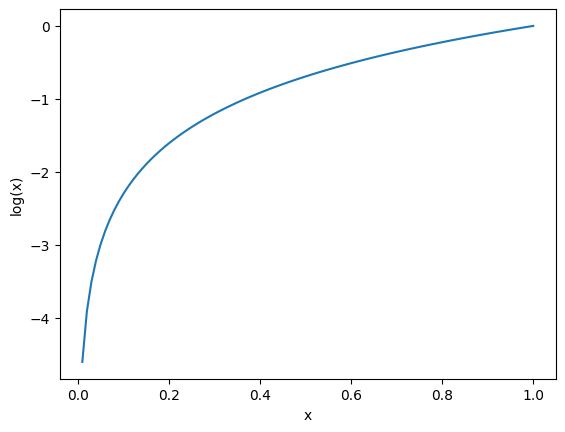

In [27]:
x = np.linspace(0.01, 1, 100) 
y = np.log(x) 
plt.plot(x, y) 
plt.xlabel('x') 
plt.ylabel('log(x)')


In [28]:
lr_results = lr_model.fit(method='newton', maxiter=10)

Optimization terminated successfully.
         Current function value: 0.465175
         Iterations 7


In [29]:
lr_sklearn = LogisticRegression(solver='newton-cg', max_iter=1000) 
lr_sklearn.fit(train_features, train_targets)

c:\Users\David gathara marigi\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\David gathara marigi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


LogisticRegression(max_iter=1000, solver='newton-cg')

In [30]:
# regularizations

In [31]:
scaler = StandardScaler() 
scaled_features = scaler.fit_transform(train_features) 
lr_sklearn = LogisticRegression(penalty='l1', 
solver='liblinear', C=0.01) 
lr_sklearn.fit(scaled_features, train_targets) 
lr_sklearn.coef_ 

array([[-0.09177091, -0.03149387, -0.04190868, -0.05807321,  0.04759691,
         0.6387541 ,  0.09262123,  0.09002068,  0.02370525,  0.03696442,
         0.00536184, -0.11607406,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.12242634, -0.09716088, -0.0206883 ,
        -0.03081571, -0.02785315, -0.01939507]])

In [32]:
scaled_features_df = pd.DataFrame( 
    scaled_features, 
    columns=train_features.columns, 
    index=train_features.index 
) 
lr_model = sm.Logit(train_targets, 
sm.add_constant(scaled_features_df)) 
reg_results = lr_model.fit_regularized(alpha=100) 
reg_results.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.47567931369409666
            Iterations: 57
            Function evaluations: 57
            Gradient evaluations: 57


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29981
Method:                                   MLE   Df Model:                           18
Date:                        Sun, 30 Mar 2025   Pseudo R-squ.:                  0.1187
Time:                                15:00:51   Log-Likelihood:                -13970.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4080      0.016    -88.843      0.000      -1.439      -1.377
LIMIT_BAL     -0.0918      0.020     -4.634      0.000      -0.131      -0.053
SEX           -0.0315      0.015     -2.122      0.034      -0.061      -0.002
EDUCATION     -0.0419      0.016     -2.600      0.009      -0.074      -0.010
MARRIAGE      -0.0581      0.016     -3.562      0.000      -0.090      -0.026
AGE            0.0476      0.016      2.933      0.003       0.016       0.079
PAY_0          0.6387      0.020     32.484      0.000       0.600       0.677
PAY_2          0.0926      0.024      3.869      0.000       0.046       0.139
PAY_3          0.0901      0.027      3.384      0.001       0.038       0.142
PAY_4          0.0237      0.029      0.821      0.412      -0.033       0.080
PAY_5          0.0370      0.030      1.230      0.219      -0.022       0.096
PAY_6          0.0053      0.025      0.214      0.831      -0.044       0.054
BILL_AMT1     -0.1160      0.019     -6.130      0.000      -0.153      -0.079
BILL_AMT2           0        nan        nan        nan         nan         nan
BILL_AMT3           0        nan        nan        nan         nan         nan
BILL_AMT4           0        nan        nan        nan         nan         nan
BILL_AMT5           0        nan        nan        nan         nan         nan
BILL_AMT6           0        nan        nan        nan         nan         nan
PAY_AMT1      -0.1224      0.028     -4.330      0.000      -0.178      -0.067
PAY_AMT2      -0.0972      0.033     -2.974      0.003      -0.161      -0.033
PAY_AMT3      -0.0207      0.022     -0.919      0.358      -0.065       0.023
PAY_AMT4      -0.0308      0.021     -1.455      0.146      -0.072       0.011
PAY_AMT5      -0.0278      0.020     -1.378      0.168      -0.067       0.012
PAY_AMT6      -0.0194      0.020     -0.955      0.339      -0.059       0.020
==============================================================================
"""

In [33]:
#Hyperparameters and cross-validation

In [34]:
from sklearn.linear_model import LogisticRegressionCV

In [35]:

lr_cv = LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100], 
                             solver='liblinear', 
                             penalty='l1', 
                             n_jobs=-1, 
                             random_state=42) 
lr_cv.fit(scaled_features, train_targets)

LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100], n_jobs=-1, penalty='l1',
                     random_state=42, solver='liblinear')

In [36]:
lr_cv.scores_[1].mean(axis=0)

array([0.78556667, 0.80863333, 0.8094    , 0.80996667, 0.80993333,
       0.80993333])

In [37]:
#Naïve Bayes for binary classification

In [38]:
df[(df['default payment next month'] == 0) & (df['PAY_0'] == -1)].shape[0] / df.shape[0]

0.15773333333333334

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
gnb = GaussianNB() 
gnb.fit(train_features, train_targets) 
gnb.score(train_features, train_targets)

0.378

In [41]:
# KNN for binary classification

In [42]:
numeric_columns = ['LIMIT_BAL', 'AGE'] + \
    [f'BILL_AMT{i}' for i in range(1, 7)] + \
    [f'PAY_AMT{i}' for i in range(1, 7)]
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE'] + \
    ['PAY_0'] + [f'PAY_{i}' for i in range(2, 6)]
scaler = StandardScaler()
scaled_numeric_features = scaler.fit_transform(
    train_features[numeric_columns]
)
scaled_features = pd.concat(
    [pd.DataFrame(data=scaled_numeric_features,
                   columns=numeric_columns,
                   index=df.index),
     train_features[categorical_columns]],
    axis=1
)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_jobs=-1) 
knn.fit(scaled_features, train_targets) 
knn.score(scaled_features, train_targets)

0.8463333333333334

In [45]:
pay_0_target = df['PAY_0'].replace({i: 1 for i in range(1, 9)}) 
pay_0_features = df.drop(['PAY_0', 'default payment next month'], axis=1) 
lr_multi = LogisticRegression(max_iter=1000) 
lr_multi.fit(pay_0_features, pay_0_target)

c:\Users\David gathara marigi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [46]:
multi_sm = sm.MNLogit(pay_0_target, 
sm.add_constant(pay_0_features)) 
multi_sm_results = multi_sm.fit() 
multi_sm_results.summary()

Optimization terminated successfully.
         Current function value: 0.762369
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                  PAY_0   No. Observations:                30000
Model:                        MNLogit   Df Residuals:                    29931
Method:                           MLE   Df Model:                           66
Date:                Sun, 30 Mar 2025   Pseudo R-squ.:                  0.3754
Time:                        15:01:48   Log-Likelihood:                -22871.
converged:                       True   LL-Null:                       -36618.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
  PAY_0=-1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7368      0.328     26.622      0.000       8.094       9.380
LIMIT_BAL  -1.051e-06   2.92e-07     -3.596      0.000   -1.62e-06   -4.78e-07
SEX           -0.1590      0.072     -2.223      0.026      -0.299      -0.019
EDUCATION     -0.2542      0.044     -5.838      0.000      -0.339      -0.169
MARRIAGE      -0.0991      0.073     -1.351      0.177      -0.243       0.045
AGE            0.0074      0.004      1.684      0.092      -0.001       0.016
PAY_2          4.2855      0.114     37.478      0.000       4.061       4.510
PAY_3         -0.4013      0.079     -5.059      0.000      -0.557      -0.246
PAY_4          0.2645      0.088      3.013      0.003       0.092       0.437
PAY_5          0.1763      0.088      2.005      0.045       0.004       0.349
PAY_6          0.3368      0.070      4.840      0.000       0.200       0.473
BILL_AMT1  -1.451e-05      2e-06     -7.256      0.000   -1.84e-05   -1.06e-05
BILL_AMT2   -3.93e-05   3.27e-06    -12.005      0.000   -4.57e-05   -3.29e-05
BILL_AMT3  -8.032e-06   3.09e-06     -2.600      0.009   -1.41e-05   -1.98e-06
BILL_AMT4   2.279e-06   2.89e-06      0.789      0.430   -3.38e-06    7.94e-06
BILL_AMT5   -1.86e-06   3.16e-06     -0.589      0.556   -8.05e-06    4.33e-06
BILL_AMT6   -7.21e-06   2.64e-06     -2.734      0.006   -1.24e-05   -2.04e-06
PAY_AMT1    3.423e-05   3.06e-06     11.201      0.000    2.82e-05    4.02e-05
PAY_AMT2      3.8e-06   1.92e-06      1.975      0.048    2.95e-08    7.57e-06
PAY_AMT3    4.261e-07   2.74e-06      0.156      0.876   -4.94e-06    5.79e-06
PAY_AMT4     3.94e-07   2.84e-06      0.139      0.890   -5.17e-06    5.96e-06
PAY_AMT5    6.995e-08   2.96e-06      0.024      0.981   -5.72e-06    5.86e-06
PAY_AMT6   -2.944e-06   1.65e-06     -1.780      0.075   -6.19e-06    2.98e-07
------------------------------------------------------------------------------
   PAY_0=0       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9797      0.333     26.930      0.000       8.326       9.633
LIMIT_BAL  -4.532e-06   3.07e-07    -14.777      0.000   -5.13e-06   -3.93e-06
SEX           -0.2313      0.073     -3.155      0.002      -0.375      -0.088
EDUCATION     -0.0285      0.044     -0.651      0.515      -0.115       0.057
MARRIAGE       0.0287      0.075      0.383      0.702      -0.118       0.176
AGE           -0.0047      0.004     -1.053      0.292      -0.014       0.004
PAY_2          3.8719      0.114     33.887      0.000       3.648       4.096
PAY_3         -0.2820      0.079     -3.553      0.000      -0.438      -0.126
PAY_4          0.4448      0.088      5.082      0.000       0.273       0.616
PAY_5          0.2042      0.088      2.321      0.020       0.032       0.377
PAY_6          0.4338      0.070      6.226      0.000       0.297       0.570
BILL_AMT1   7.103e-06   1.76e-06      4.039      0.000    3.66e-06    1.05e-05
BI

In [47]:
#One-versus-rest and one-versus-one formulations

In [48]:
lr_multi_ovr = LogisticRegression(max_iter=1000, multi_class='ovr') 

In [49]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier 

In [50]:
lr_ovr = OneVsRestClassifier(LogisticRegression(max_iter=1000), 
n_jobs=-1) 
lr_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000), 
n_jobs=-1) 
lr_ovr.fit(pay_0_features, pay_0_target) 
lr_ovo.fit(pay_0_features, pay_0_target)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000), n_jobs=-1)

In [51]:
lr_ovo.estimators_[0]

LogisticRegression(max_iter=1000)

In [52]:
# multi label classification

In [53]:
import swifter

In [54]:
 
mo_targets = df[['PAY_0'] + [f'PAY_{i}' for i in range(2, 
7)]].copy() 
mo_targets = mo_targets.swifter.apply(lambda x: (x > 
0).astype(int), axis=1)

In [55]:
from sklearn.multioutput import MultiOutputClassifier

In [56]:
mo_features = df.drop(columns=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month'])
mo_clf = MultiOutputClassifier(LogisticRegression(max_iter=1000), 
n_jobs=-1) 
mo_clf.fit(mo_features, mo_targets)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000), n_jobs=-1)

In [57]:
from sklearn.multioutput import ClassifierChain

In [58]:
cc_clf = ClassifierChain(LogisticRegression(max_iter=5000)) 
cc_clf.fit(mo_features, mo_targets) 

c:\Users\David gathara marigi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\David gathara marigi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

ClassifierChain(base_estimator=LogisticRegression(max_iter=5000))